In [45]:
import numpy as np
import matplotlib.pyplot as plt

In [46]:
# ================= GLOBAL PARAMETERS =================

N_global = 100000        # number of simulation samples

lam_exp_global = 1/10    # rate of exponential RV (E[X] = 10)
lam_pois_global = 10     # mean & rate of Poisson RV (E[Z] = 10)

lam_arr_global = 9       # arrival rate λ for M/M/1 queue
mu_srv_global  = 10      # service rate μ for M/M/1 queue


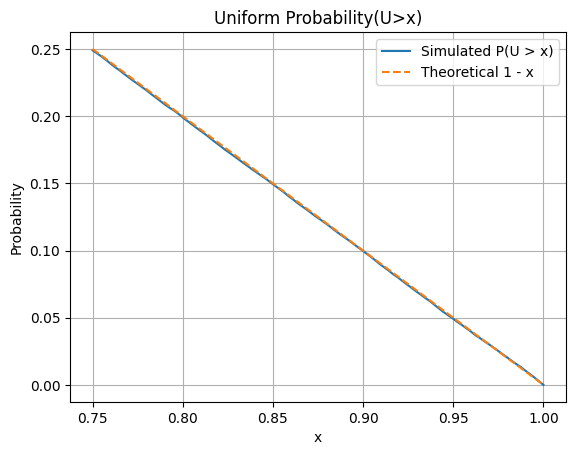

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# ---------- Q1: Uniform Random Variable ----------

U = np.random.uniform(0, 1, N_global)

x_vals = np.linspace(0.75, 1, 100)

P_empirical = [np.mean(U > x) for x in x_vals]
P_theoretical = 1 - x_vals

plt.figure()
plt.plot(x_vals, P_empirical, label="Simulated P(U > x)")
plt.plot(x_vals, P_theoretical, '--', label="Theoretical 1 - x")
plt.xlabel("x")
plt.ylabel("Probability")
plt.title("Uniform Probability(U>x)")
plt.grid(True)
plt.legend()
plt.show()


#My Function for PDF (Pois and Exp)

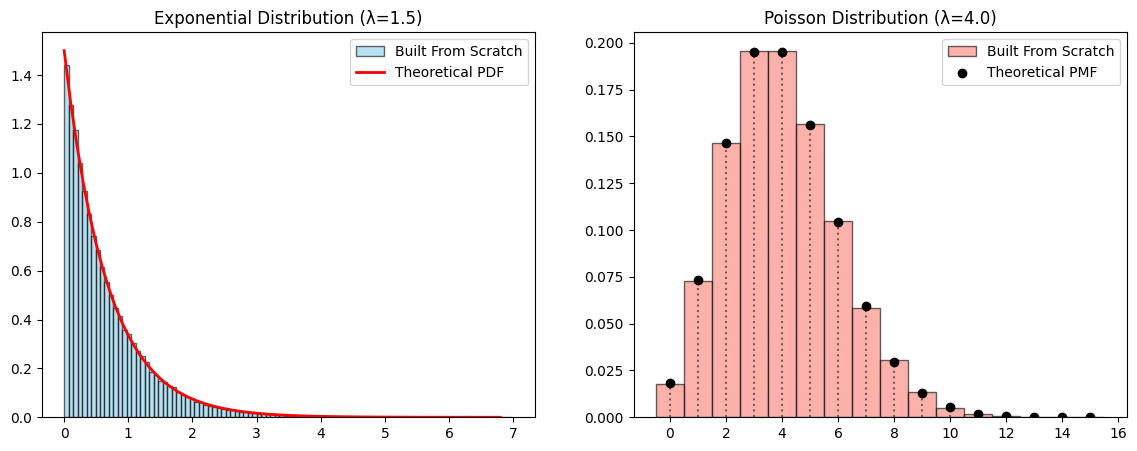

In [52]:
import random
import math
import matplotlib.pyplot as plt

# ----- From Scratch Functions -----

def generate_exponential(lam, n=10000):
    """Generates Exponential RVs using Inverse Transform Sampling"""
    samples = []
    for _ in range(n):
        u = random.random() # Uniform(0,1)
        # x = -ln(u) / lambda
        x = -math.log(u) / lam
        samples.append(x)
    return samples

def generate_poisson(lam, n=10000):
    """Generates Poisson RVs using the inter-arrival time method"""
    samples = []
    for _ in range(n):
        L = math.exp(-lam)
        k = 0
        p = 1.0
        while p > L:
            k += 1
            p *= random.random()
        samples.append(k - 1)
    return samples

# ----- Comparison and Validation -----

lam_exp = 1.5
lam_poi = 4.0
N = 100000

# Generate data
exp_data = generate_exponential(lam_exp, N)
poi_data = generate_poisson(lam_poi, N)

# Plotting Comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Exponential Plot (Continuous)
ax1.hist(exp_data, bins=100, density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Built From Scratch')

x_vals = [i * 0.1 for i in range(int(max(exp_data)*10))]
y_theoretical = [lam_exp * math.exp(-lam_exp * x) for x in x_vals]
ax1.plot(x_vals, y_theoretical, 'r-', lw=2, label='Theoretical PDF')
ax1.set_title(f"Exponential Distribution (λ={lam_exp})")
ax1.legend()

# Poisson Plot (Discrete)
# For Poisson, we use a bar chart to represent PMF
bins = range(min(poi_data), max(poi_data) + 2)
ax2.hist(poi_data, bins=bins, density=True, alpha=0.6, color='salmon', edgecolor='black', label='Built From Scratch', align='left')
k_vals = list(range(max(poi_data) + 1))
ax2.vlines(k_vals, 0, y_poi_theoretical, colors='black', linestyles=':', alpha=0.5)
def poisson_pmf(k, lam):
    return (math.pow(lam, k) * math.exp(-lam)) / math.factorial(k)
y_poi_theoretical = [poisson_pmf(k, lam_poi) for k in k_vals]
ax2.scatter(k_vals, y_poi_theoretical, color='black', zorder=3, label='Theoretical PMF')
ax2.set_title(f"Poisson Distribution (λ={lam_poi})")
ax2.legend()
plt.show()

#With Python library

In [36]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import expon, poisson

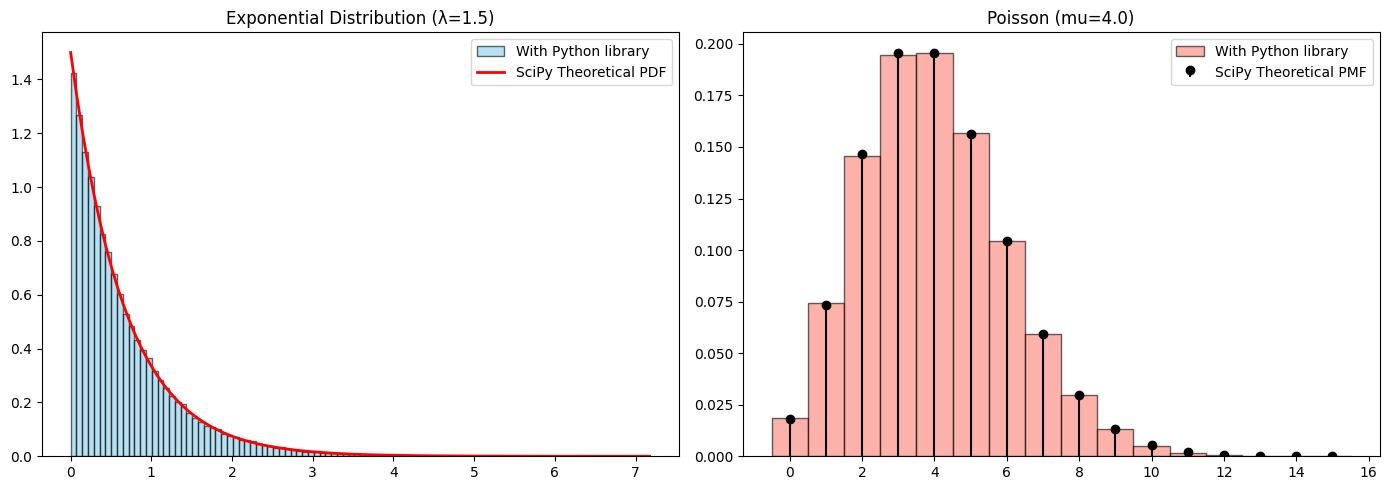

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, poisson

# Parameters (Using the same values as before)
lam_exp = 1.5
lam_poi = 4.0
N = 100000

# ----- Step 1: Generate Samples using NumPy -----
# Note: NumPy's exponential uses 'scale' which is 1/lambda
exp_samples = np.random.exponential(scale=1/lam_exp, size=N)
poi_samples = np.random.poisson(lam=lam_poi, size=N)

# ----- Step 2: Plotting and Comparison -----
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# 1. Exponential Plot
count, bins, ignored = ax1.hist(exp_samples, bins=100, density=True,
                                alpha=0.6, color='skyblue', edgecolor='black', label='With Python library')
# Theoretical PDF using SciPy
x_range = np.linspace(0, np.max(exp_samples), 100)
ax1.plot(x_range, expon.pdf(x_range, scale=1/lam_exp),
         'r-', lw=2, label='SciPy Theoretical PDF')
ax1.set_title(f"Exponential Distribution (λ={lam_exp})")
ax1.legend()

# 2. Poisson Plot
# Find the range of outcomes
max_val = np.max(poi_samples)
bins_poi = np.arange(0, max_val + 2) - 0.5
ax2.hist(poi_samples, bins=bins_poi, density=True,
         alpha=0.6, color='salmon', edgecolor='black', label='With Python library')
# Theoretical PMF using SciPy
k_values = np.arange(0, max_val + 1)
ax2.stem(k_values, poisson.pmf(k_values, mu=lam_poi),
         linefmt='k-', markerfmt='ko', basefmt=" ", label='SciPy Theoretical PMF')
ax2.set_title(f"Poisson (mu={lam_poi})")
ax2.legend()

plt.tight_layout()
plt.show()

#Adding Value E[x] = 10

<>:41: SyntaxWarning: invalid escape sequence '\l'
<>:51: SyntaxWarning: invalid escape sequence '\l'
<>:41: SyntaxWarning: invalid escape sequence '\l'
<>:51: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipython-input-2314143683.py:41: SyntaxWarning: invalid escape sequence '\l'
  ax1.set_title(f"Exponential Tail Prob $P(X > x)$\n$E[X]=10$ ($\lambda=0.1$)")
/tmp/ipython-input-2314143683.py:51: SyntaxWarning: invalid escape sequence '\l'
  ax2.set_title(f"Poisson Tail Prob $P(Z > z)$\n$E[Z]=10$ ($\lambda=10$)")


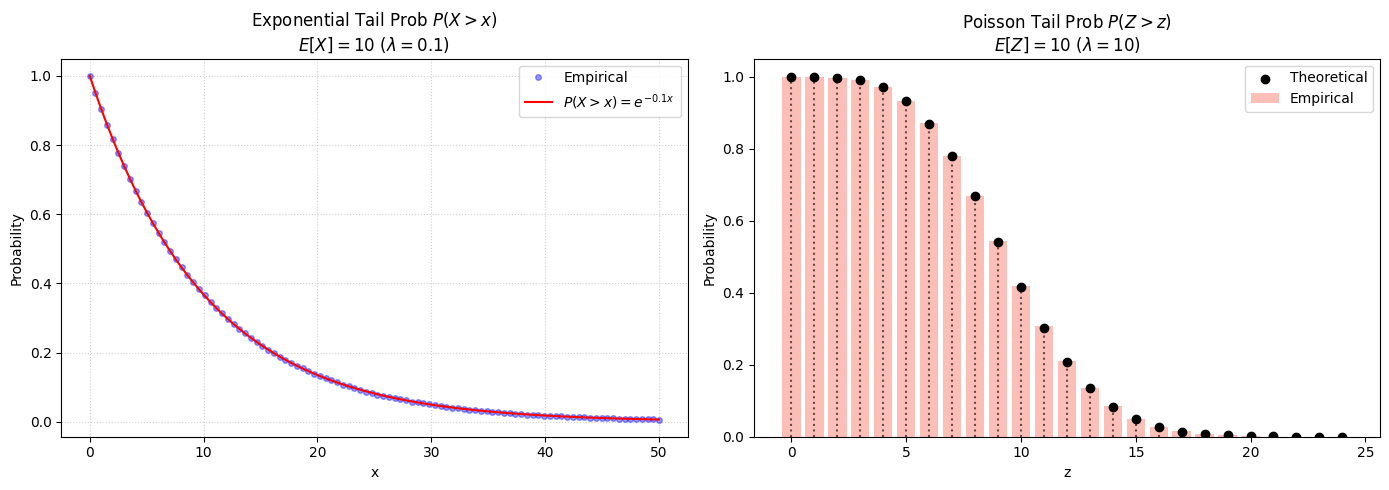

In [18]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, poisson

# ----- Parameters for E[X]=10 and E[Z]=10 -----
lam_exp = 0.1  # lambda = 1/E[X]
lam_poi = 10.0 # lambda = E[Z]
N = 100000

# ----- 1. Exponential Tail Probability P(X > x) -----
x_vals = np.linspace(0, 50, 100)
# Empirical (from scratch logic)
u_samples = [random.random() for _ in range(N)]
exp_samples = [-math.log(u) / lam_exp for u in u_samples]
p_x_greater_empirical = [np.mean(np.array(exp_samples) > x) for x in x_vals]
# Theoretical
p_x_greater_theoretical = [math.exp(-lam_exp * x) for x in x_vals]

# ----- 2. Poisson Tail Probability P(Z > z) -----
z_vals = np.arange(0, 25)
# Empirical (from scratch logic)
poi_samples = []
for _ in range(N):
    L, k, p = math.exp(-lam_poi), 0, 1.0
    while p > L:
        k += 1
        p *= random.random()
    poi_samples.append(k - 1)
p_z_greater_empirical = [np.mean(np.array(poi_samples) > z) for z in z_vals]
# Theoretical
p_z_theoretical = [1 - poisson.cdf(z, mu=lam_poi) for z in z_vals]

# ----- Plotting -----
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Exponential Plot
ax1.plot(x_vals, p_x_greater_empirical, 'ob', markersize=4, alpha=0.4, label='Empirical')
ax1.plot(x_vals, p_x_greater_theoretical, 'r-', label=r'$P(X > x) = e^{-0.1x}$')
ax1.set_title(f"Exponential Tail Prob $P(X > x)$\n$E[X]=10$ ($\lambda=0.1$)")
ax1.set_xlabel("x")
ax1.set_ylabel("Probability")
ax1.grid(True, linestyle=':', alpha=0.6)
ax1.legend()

# Poisson Plot
ax2.bar(z_vals, p_z_greater_empirical, alpha=0.5, color='salmon', label='Empirical')
ax2.scatter(z_vals, p_z_theoretical, color='black', zorder=3, label='Theoretical')
ax2.vlines(z_vals, 0, p_z_theoretical, colors='black', linestyles=':', alpha=0.6)
ax2.set_title(f"Poisson Tail Prob $P(Z > z)$\n$E[Z]=10$ ($\lambda=10$)")
ax2.set_xlabel("z")
ax2.set_ylabel("Probability")
ax2.legend()

plt.tight_layout()
plt.show()

#M/M/1-Queue

<>:51: SyntaxWarning: invalid escape sequence '\l'
<>:51: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipython-input-2096117525.py:51: SyntaxWarning: invalid escape sequence '\l'
  plt.title("M/M/1 Stationary Probability ($P_n$) for $\lambda=9, \mu=10$")


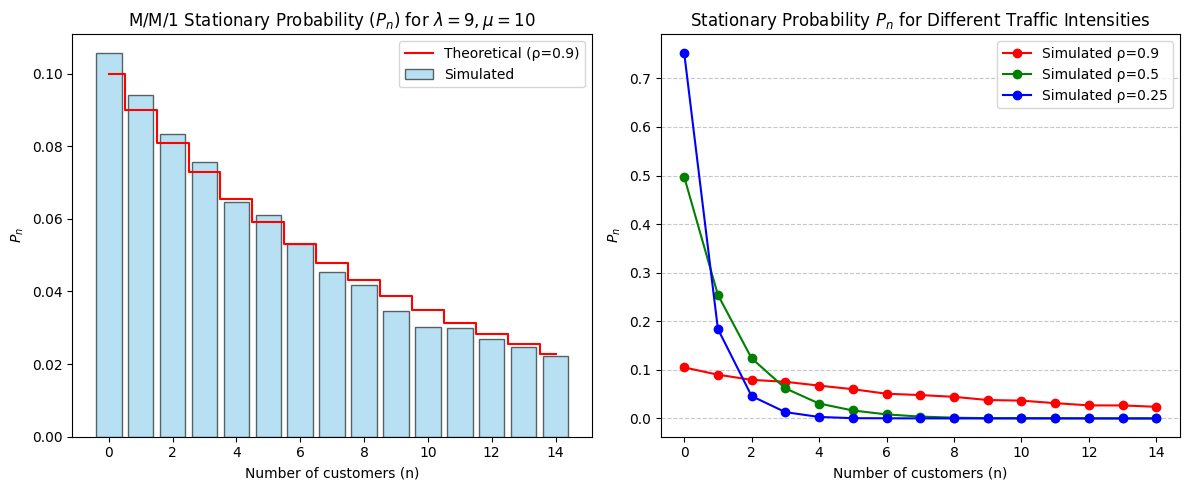

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

# 1. Exponential Generator from scratch (Inverse Transform)
def generate_exponential(rate, n):
    return [-math.log(1.0 - random.random()) / rate for _ in range(n)]

def simulate_mm1_stationary(lam, mu, num_events=100000):
    # Inter-arrival and service times
    inter_arrivals = generate_exponential(lam, num_events)
    service_times = generate_exponential(mu, num_events)

    arrival_times = np.cumsum(inter_arrivals)
    departure_times = np.zeros(num_events)

    # Calculate departure times
    current_time = 0
    for i in range(num_events):
        start_service = max(arrival_times[i], current_time)
        departure_times[i] = start_service + service_times[i]
        current_time = departure_times[i]

    # Sample the number of customers at random time points to find stationary distribution
    rho = lam / mu
    max_time = arrival_times[-1]
    sample_times = np.linspace(0, max_time, 20000)

    counts = []
    for t in sample_times:
        # Customers in system = (those who arrived) - (those who departed)
        arrived = np.searchsorted(arrival_times, t)
        departed = np.searchsorted(departure_times, t)
        counts.append(arrived - departed)

    # Calculate probabilities Pn
    max_n = 15
    pn_simulated = [counts.count(n) / len(counts) for n in range(max_n)]
    pn_theoretical = [(1 - rho) * (rho**n) for n in range(max_n)]

    return range(max_n), pn_simulated, pn_theoretical

# ----- Q3 Part 1: Lambda=9, Mu=10 (rho=0.9) -----
n_vals, sim_09, theory_09 = simulate_mm1_stationary(9, 10)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(n_vals, sim_09, alpha=0.6, color='skyblue', edgecolor='black', label='Simulated')
plt.step(n_vals, theory_09, where='mid', color='red', label='Theoretical (ρ=0.9)')
plt.title("M/M/1 Stationary Probability ($P_n$) for $\lambda=9, \mu=10$")
plt.xlabel("Number of customers (n)")
plt.ylabel("$P_n$")
plt.legend()

# ----- Q3 Part 2: Comparison for rho = 0.9, 0.5, 0.25 -----
plt.subplot(1, 2, 2)
intensities = [0.9, 0.5, 0.25]
colors = ['red', 'green', 'blue']

for rho, color in zip(intensities, colors):
    # mu is fixed at 10, lambda varies to change rho
    _, sim, _ = simulate_mm1_stationary(10 * rho, 10)
    plt.plot(n_vals, sim, 'o-', color=color, label=f'Simulated ρ={rho}')

plt.title("Stationary Probability $P_n$ for Different Traffic Intensities")
plt.xlabel("Number of customers (n)")
plt.ylabel("$P_n$")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

plt.tight_layout()
plt.show()